## Modelo de Risco de Crédito

Modelo tem a intenção de calcular se o banco deve ou não conceder um empréstimo à um cliente.

'saldo_cc': saldo da conta corrente

'duracao_meses': duração do empréstimo em meses

'historico_credito: histórico de credito do cliente 

'proposito': o pq ter pedido o emprestimo

'quantidade': quantidade de valor concedido 

'saldo_cp': saldo da conta poupança 

'duracao_emprego', 

'porc_salario': porcentual do salário

'anos_res': quantos anos faz que mora no mesmo lugar

'idade', 

'outros_creditos', 

'casa_propria': se a casa é própria ou alugada 

'emprestimo_anterior',

'emprego': se está empregado

'dependentes': Esposa, filhos, etc

'telefone': se tem telefone (sim/não)

'situacao(pago): se pagou o não o empréstimo


In [1]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as ss

#Filtrar warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Colocar os parametros dos graficos

plt.rcParams['figure.figsize'] = (10,6)

#Separação dos dados em treino e teste
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

#Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [2]:
#Carregando os dados
data = pd.read_csv('credito.csv')

In [3]:
#Verificando a quantidade de linhas e colunas
data.shape

(1000, 17)

In [4]:
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [5]:
colunas = ['saldo_cc', 'duracao_meses','historico_credito','proposito','quantidade','saldo_cp','duracao_emprego','porc_salario','anos_res','idade',
'outros_credito','casa_propria','emprestimo_anterior','emprego','dependentes','telefone','situacao(pago)']

In [6]:
data.columns = colunas

In [7]:
data.columns

Index(['saldo_cc', 'duracao_meses', 'historico_credito', 'proposito',
       'quantidade', 'saldo_cp', 'duracao_emprego', 'porc_salario', 'anos_res',
       'idade', 'outros_credito', 'casa_propria', 'emprestimo_anterior',
       'emprego', 'dependentes', 'telefone', 'situacao(pago)'],
      dtype='object')

In [8]:
data.head()

,saldo_cc,duracao_meses,historico_credito,proposito,quantidade,saldo_cp,duracao_emprego,porc_salario,anos_res,idade,outros_credito,casa_propria,emprestimo_anterior,emprego,dependentes,telefone,situacao(pago)
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [9]:
data.dtypes

saldo_cc               object
duracao_meses           int64
historico_credito      object
proposito              object
quantidade              int64
saldo_cp               object
duracao_emprego        object
porc_salario            int64
anos_res                int64
idade                   int64
outros_credito         object
casa_propria           object
emprestimo_anterior     int64
emprego                object
dependentes             int64
telefone               object
situacao(pago)         object
dtype: object

In [10]:
data['saldo_cc'].value_counts()

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: saldo_cc, dtype: int64

In [11]:
data['historico_credito'].value_counts()

good         530
critical     293
poor          88
very good     49
perfect       40
Name: historico_credito, dtype: int64

In [12]:
data['proposito'].value_counts()

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: proposito, dtype: int64

In [13]:
data['saldo_cp'].value_counts()

< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: saldo_cp, dtype: int64

In [14]:
data['duracao_emprego'].value_counts()

1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: duracao_emprego, dtype: int64

In [15]:
data['outros_credito'].value_counts()

none     814
bank     139
store     47
Name: outros_credito, dtype: int64

In [16]:
data['casa_propria'].value_counts()

own      713
rent     179
other    108
Name: casa_propria, dtype: int64

In [17]:
data['emprego'].value_counts()

skilled       630
unskilled     200
management    148
unemployed     22
Name: emprego, dtype: int64

In [18]:
data['telefone'].value_counts()

no     596
yes    404
Name: telefone, dtype: int64

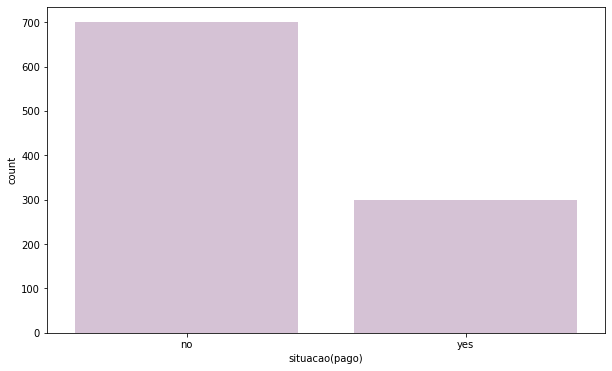

In [19]:
#Verificando a variável Sitiaçao
sns.countplot(x= 'situacao(pago)', color = 'thistle', data = data)

In [20]:
#Verificando valores Nan
data.isnull().sum()

saldo_cc               0
duracao_meses          0
historico_credito      0
proposito              0
quantidade             0
saldo_cp               0
duracao_emprego        0
porc_salario           0
anos_res               0
idade                  0
outros_credito         0
casa_propria           0
emprestimo_anterior    0
emprego                0
dependentes            0
telefone               0
situacao(pago)         0
dtype: int64

In [21]:
quali_df = data.select_dtypes(include=['object']).copy()
from sklearn.preprocessing import LabelEncoder
quali_df = quali_df.apply(LabelEncoder().fit_transform)

In [22]:
quali_df.head()

,saldo_cc,historico_credito,proposito,saldo_cp,duracao_emprego,outros_credito,casa_propria,emprego,telefone,situacao(pago)
0,1,0,4,4,3,1,1,1,1,0
1,0,1,4,2,0,1,1,1,0,1
2,3,0,3,2,1,1,1,3,0,0
3,1,1,4,2,1,1,0,1,0,0
4,1,3,1,2,0,1,0,1,0,1


In [23]:
# E então colocamos os valores das variáveis binárias como float
for col in quali_df.columns:
    quali_df[col] = quali_df[col].apply(lambda x: float(x))

Text(0.5, 1.0, 'Recursos Binários: Visualizando os 1s (os valores restantes são 0.)')

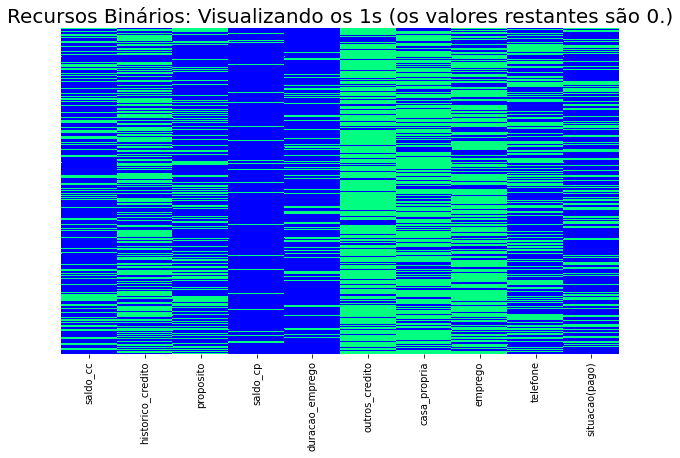

In [24]:
# Plot
p = sns.heatmap(quali_df == 1, yticklabels = False, cbar = False,  cmap="winter")
p.axes.set_title("Recursos Binários: Visualizando os 1s (os valores restantes são 0.)", fontsize = 20)

In [25]:
# Função para calcular a associação entre variáveis categóricas

# Função
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    # Teste qui-quadrado de independência de variáveis em uma tabela de contingência.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [26]:
# Coleta o nome das colunas do dataset

# Lista
categorical_vars = []

# Loop
for column in quali_df:
    categorical_vars.append(column)

In [27]:
# Visualiza
categorical_vars

['saldo_cc',
 'historico_credito',
 'proposito',
 'saldo_cp',
 'duracao_emprego',
 'outros_credito',
 'casa_propria',
 'emprego',
 'telefone',
 'situacao(pago)']

In [28]:
# Variável alvo
y = 'situacao(pago)'

# Print
print('\nA Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.')
print('\n')

# Loop
for var in categorical_vars:
    print('Associação da Variável ' + var + ' com a variável resposta:', 
          cramers_v(quali_df[var], quali_df[y]))


A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.


Associação da Variável saldo_cc com a variável resposta: 0.3476189010590424
Associação da Variável historico_credito com a variável resposta: 0.24030230119487
Associação da Variável proposito com a variável resposta: 0.05666617047288448
Associação da Variável saldo_cp com a variável resposta: 0.1792402952214944
Associação da Variável duracao_emprego com a variável resposta: 0.11991106245316734
Associação da Variável outros_credito com a variável resposta: 0.10415394681626367
Associação da Variável casa_propria com a variável resposta: 0.12733448032933792
Associação da Variável emprego com a variável resposta: 0.0
Associação da Variável telefone com a variável resposta: 0.013104557655738317
Associação da Variável situacao(pago) com a variável resposta: 0.9976166590454338


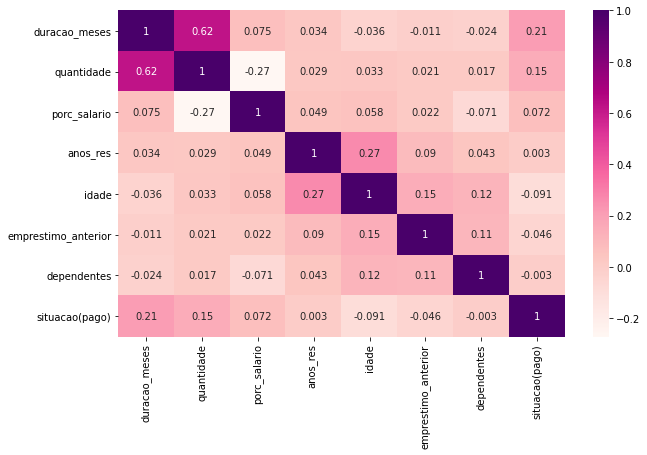

In [29]:
#Verificando a correlação
data_quanti = data.drop(columns = (categorical_vars),axis= 1)
# Concatena as variáveis quantitativas com a variável target
data_quanti = pd.concat([data_quanti, quali_df['situacao(pago)']], axis = 1)

corr = data_quanti.corr()
sns.heatmap(corr, annot = True, cmap="RdPu",data=data)

In [30]:
# a variável emprego não parece ter relação com a variável target, por isso vamos retirar.
#Vamos retirar a variável tempo em meses, pois possui alta relação com a quantidade

data.drop(columns=['quantidade', 'emprego'], axis = 1, inplace=True)


In [31]:
data_quanti = data_quanti.drop('situacao(pago)', axis = 1)

# Concatena as variáveis quantitativas com a variável target
df = pd.concat([data_quanti, quali_df], axis = 1)

In [32]:
df.head()

,duracao_meses,quantidade,porc_salario,anos_res,idade,emprestimo_anterior,dependentes,saldo_cc,historico_credito,proposito,saldo_cp,duracao_emprego,outros_credito,casa_propria,emprego,telefone,situacao(pago)
0,6,1169,4,4,67,2,1,1.0,0.0,4.0,4.0,3.0,1.0,1.0,1.0,1.0,0.0
1,48,5951,2,2,22,1,1,0.0,1.0,4.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0
2,12,2096,2,3,49,1,2,3.0,0.0,3.0,2.0,1.0,1.0,1.0,3.0,0.0,0.0
3,42,7882,2,4,45,1,2,1.0,1.0,4.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0
4,24,4870,3,4,53,2,2,1.0,3.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0


In [33]:
df.shape

(1000, 17)

In [34]:
X = df.drop('situacao(pago)', axis = 1)
Y = df['situacao(pago)']

In [35]:
#Separando os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.20, random_state = 101)

In [36]:
# Vamos padronizar as variáveis de entrada

# Cria o padronizador
scaler = StandardScaler()

# Treina e aplica nos dados de treino
X_treino_scaled = scaler.fit_transform(X_treino.values)

# Apenas aplica nos dados de teste
X_teste_scaled = scaler.transform(X_teste.values)

## Seleção de Variáveis - Recursive Feature Selection com Validação Cruzada

In [37]:
# Selecionando as variáveis

estimador_rfc = RandomForestClassifier(random_state = 121)

# Cria o seletor
seletor_f1 = RFECV(estimator = estimador_rfc, step = 1, cv = StratifiedKFold(10), scoring = 'f1')

# Treinamos o seletor
seletor_f1 = seletor_f1.fit(X_treino_scaled, y_treino)

In [38]:
print('Número Ideal de Atributos: {}'.format(seletor_f1.n_features_))

Número Ideal de Atributos: 10


In [39]:
# Vamos avaliar a acurácia do modelo com F1 Score
previsoes_seletor_f1 = seletor_f1.predict(X_teste_scaled)
from sklearn.metrics import accuracy_score
acc_seletor_f1 = accuracy_score(y_teste, previsoes_seletor_f1)
acc_seletor_f1

0.72

In [40]:
# Relatório de Classificação
print(classification_report(y_teste, previsoes_seletor_f1))

              precision    recall  f1-score   support

         0.0       0.73      0.91      0.81       131
         1.0       0.68      0.36      0.47        69

    accuracy                           0.72       200
   macro avg       0.70      0.64      0.64       200
weighted avg       0.71      0.72      0.69       200



In [41]:
# Extrai as variáveis e quais são importante ou não para o modelo
variaveis_rfecv = pd.Series(seletor_f1.support_, index = X_treino.columns)
variaveis_rfecv

duracao_meses           True
quantidade              True
porc_salario            True
anos_res                True
idade                   True
emprestimo_anterior    False
dependentes            False
saldo_cc                True
historico_credito       True
proposito               True
saldo_cp                True
duracao_emprego         True
outros_credito         False
casa_propria           False
emprego                False
telefone               False
dtype: bool

In [42]:
# Registra os atributos para remoção
atributos_para_remover = variaveis_rfecv[variaveis_rfecv == False].index
print(atributos_para_remover)

Index(['emprestimo_anterior', 'dependentes', 'outros_credito', 'casa_propria',
       'emprego', 'telefone'],
      dtype='object')


In [43]:
# Cria um dataframe com os resultados
resultado_seletor_f1 = pd.DataFrame()
resultado_seletor_f1['Atributo'] = X_treino.columns[np.where(seletor_f1.support_ == True)]
resultado_seletor_f1['Score'] = seletor_f1.estimator_.feature_importances_
resultado_seletor_f1.sort_values('Score', inplace = True, ascending = True)

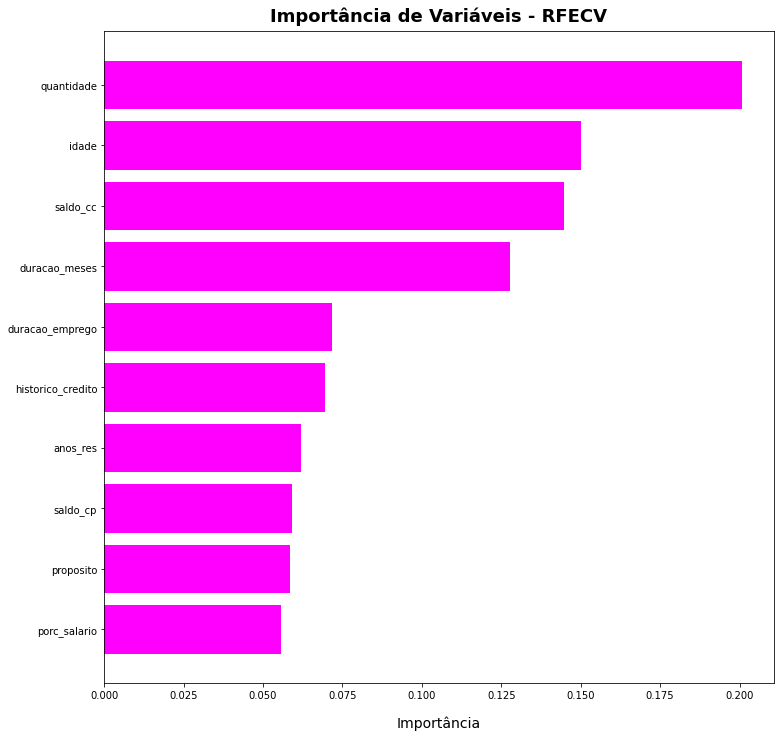

In [44]:
# Plot 
plt.figure(figsize = (12, 12))
plt.barh(y = resultado_seletor_f1['Atributo'], width = resultado_seletor_f1['Score'], color = 'Magenta')
plt.title('Importância de Variáveis - RFECV', fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel('Importância', fontsize = 14, labelpad = 15)
plt.show()

In [45]:
X_treino_scaled = pd.DataFrame(X_treino_scaled,  columns=X_treino.columns)
X_teste_scaled = pd.DataFrame(X_teste_scaled,  columns=X_teste.columns) 

In [46]:
X_teste_scaled

,duracao_meses,quantidade,porc_salario,anos_res,idade,emprestimo_anterior,dependentes,saldo_cc,historico_credito,proposito,saldo_cp,duracao_emprego,outros_credito,casa_propria,emprego,telefone
0,0.271330,-0.674036,0.889964,-0.765675,0.639173,1.050824,2.380476,-0.453936,1.902917,-0.968231,-0.142030,1.839600,0.239046,-2.017327,-0.273233,-0.827170
1,-0.224061,-0.249691,-0.004472,1.049258,0.639173,-0.686075,-0.420084,1.145837,-0.037597,0.910309,-0.142030,-1.147067,0.239046,-0.125344,-0.273233,1.208941
2,-0.554322,-0.646392,-1.793344,-0.765675,-0.055816,-0.686075,-0.420084,-1.253822,-0.037597,-1.594411,-1.058353,1.092933,0.239046,-0.125344,-0.273233,1.208941
3,-1.379974,-0.936828,-1.793344,0.141792,-1.098301,-0.686075,2.380476,1.145837,-0.037597,0.910309,-0.142030,0.346267,0.239046,1.766639,1.838712,-0.827170
4,2.005199,-0.064444,0.889964,1.049258,-1.272049,-0.686075,-0.420084,-1.253822,-0.037597,0.910309,-1.974676,-1.147067,0.239046,1.766639,-0.273233,-0.827170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.262112,-0.499559,0.889964,1.049258,0.117931,-0.686075,-0.420084,1.145837,-0.037597,0.284129,-0.142030,-1.147067,2.629503,-2.017327,-0.273233,1.208941
196,-0.471757,-0.609774,-0.004472,0.141792,2.202901,1.050824,-0.420084,-1.253822,1.902917,1.536489,0.774293,-1.147067,2.629503,-0.125344,-0.273233,-0.827170
197,0.766721,1.574418,-1.793344,1.049258,2.376648,1.050824,-0.420084,1.145837,-1.007855,-0.968231,1.690616,1.092933,0.239046,-0.125344,-0.273233,-0.827170
198,0.271330,-0.114346,-0.004472,1.049258,1.334163,-0.686075,-0.420084,0.345951,-0.037597,0.910309,-0.142030,1.092933,0.239046,-2.017327,-0.273233,-0.827170


In [47]:
# Remove as variáveis menos relevantes
X_treino_scaled = X_treino_scaled.drop(atributos_para_remover, axis = 1)
X_teste_scaled = X_teste_scaled.drop(atributos_para_remover, axis = 1)


# Modelo v1- KNN

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_treino_scaled, y_treino)
resultado = knn.predict(X_teste_scaled)
resultado_proba = knn.predict_proba(X_teste_scaled)

In [49]:
# Classification Report
print(classification_report(y_teste, resultado))

              precision    recall  f1-score   support

         0.0       0.69      0.83      0.75       131
         1.0       0.48      0.29      0.36        69

    accuracy                           0.65       200
   macro avg       0.58      0.56      0.56       200
weighted avg       0.62      0.65      0.62       200



In [50]:
# Score AUC
print(roc_auc_score(y_teste, resultado))

0.560958070583029


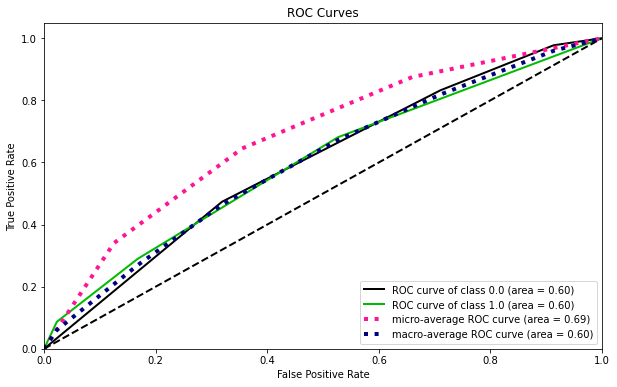

In [51]:
# Calcula a Curva ROC para cada classe

skplt.metrics.plot_roc_curve(y_teste, resultado_proba)
plt.show()

# Modelo v2 - Random Forest

In [52]:
# Cria e treina o modelo
rfc = RandomForestClassifier(criterion= 'gini',
                             max_depth= 60,
                             min_samples_leaf= 3,
                             min_samples_split= 3,
                             n_estimators= 30)
rfc.fit(X_treino_scaled, y_treino)

RandomForestClassifier(max_depth=60, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=30)

In [53]:
# Previsões
resultado2 = rfc.predict(X_teste_scaled)
resultado2_proba = rfc.predict_proba(X_teste_scaled)

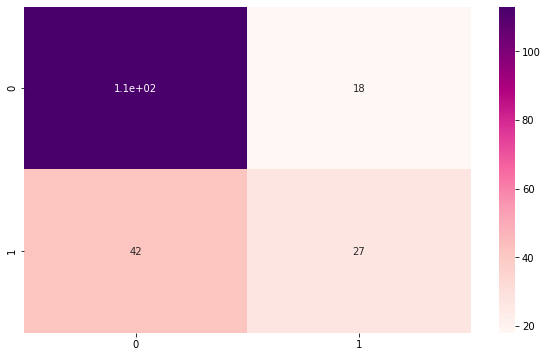

In [54]:
sns.heatmap(confusion_matrix(y_teste, resultado2), annot=True, cmap="RdPu")

In [55]:
# Relatório de classificação
report = classification_report(y_teste, resultado2)
print(report)

              precision    recall  f1-score   support

         0.0       0.73      0.86      0.79       131
         1.0       0.60      0.39      0.47        69

    accuracy                           0.70       200
   macro avg       0.66      0.63      0.63       200
weighted avg       0.68      0.70      0.68       200



In [56]:
# Score AUC
print(roc_auc_score(y_teste, resultado2))

0.6269498838367076


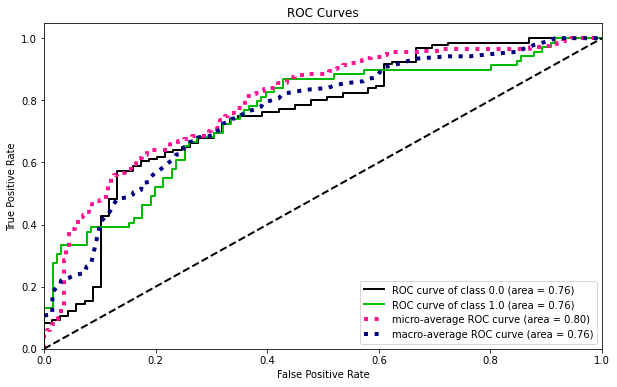

In [57]:
# Calcula a Curva ROC para cada classe

skplt.metrics.plot_roc_curve(y_teste, resultado2_proba)
plt.show()

## Otimização de Hiperparâmetros


#valores de estimators 
valores_estimators = [15,20,25,30,35,40]

# critério de divisão.
valores_criterion = ['gini','entropy']

# profundidade máxima de cada árvore
valores_max_depth = [55,57,60,62,65]

# parametros min_samples_split e min_samples_leaf
valores_min_samples_split = [3,4,5]
valores_min_samples_leaf = [3,4,5]

#dicionário 
parametros_grid = dict(n_estimators=valores_estimators, criterion=valores_criterion,
                       max_depth=valores_max_depth, min_samples_split=valores_min_samples_split, 
                       min_samples_leaf=valores_min_samples_leaf )

#Instancia o GridSearch 
rf = RandomForestClassifier() 
grid = GridSearchCV(rf, parametros_grid, cv=5, scoring='accuracy')

grid.fit(X_treino_scaled,y_treino)

grid.best_params_

## Modelo v3 - Random Forest - Balanceado

In [58]:
#Balanceamento com smote
seed = 101
# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X_treino_scaled, y_treino)

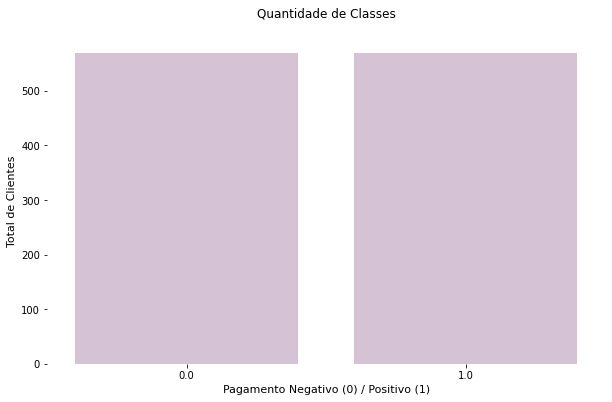

In [59]:
#Verificando o balanceamento da variável target
sns.countplot(y_res, color = 'thistle')
plt.box(False)
plt.xlabel("Pagamento Negativo (0) / Positivo (1)", fontsize = 11)
plt.ylabel("Total de Clientes", fontsize = 11)
plt.title("Quantidade de Classes\n")
plt.show()

In [60]:
# Cria e treina o modelo
rfc = RandomForestClassifier(criterion= 'gini',
                             max_depth= 80,
                             min_samples_leaf= 2,
                             min_samples_split= 5,
                             n_estimators= 100)
rfc.fit(X_res, y_res)

RandomForestClassifier(max_depth=80, min_samples_leaf=2, min_samples_split=5)

In [61]:
# Previsões
resultado3 = rfc.predict(X_teste_scaled)
resultado3_proba = rfc.predict_proba(X_teste_scaled)

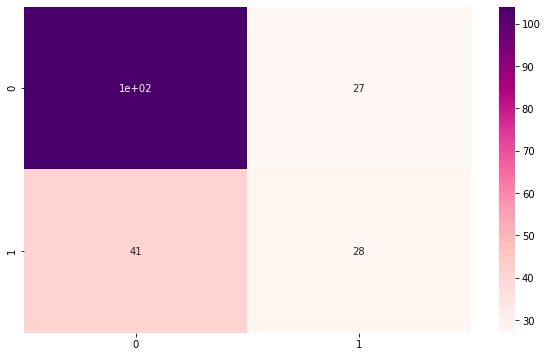

In [62]:
sns.heatmap(confusion_matrix(y_teste, resultado3), annot=True, cmap="RdPu")

In [63]:
# Relatório de classificação
report = classification_report(y_teste, resultado3)
print(report)

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       131
         1.0       0.51      0.41      0.45        69

    accuracy                           0.66       200
   macro avg       0.61      0.60      0.60       200
weighted avg       0.65      0.66      0.65       200



In [64]:
# Score AUC
print(roc_auc_score(y_teste, resultado3))

0.5998451156101339


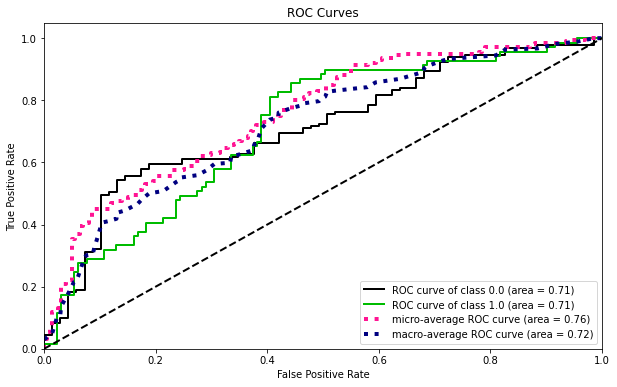

In [65]:
# Calcula a Curva ROC para cada classe

skplt.metrics.plot_roc_curve(y_teste, resultado3_proba)
plt.show()

## Modelo- v4 - XGBoost


In [66]:
xgb_model = xgb.XGBClassifier(learning_rate = 0.05, 
                              max_depth = 20, 
                              n_estimators = 1000,
                             min_child_weight = 2,
                             gamma = 0.1,
                            )
xgb_model.fit(X_res,y_res)

XGBClassifier(gamma=0.1, learning_rate=0.05, max_depth=20, min_child_weight=2,
              n_estimators=1000)

In [67]:
resultado3 = xgb_model.predict_proba(X_teste_scaled)[:,1]
valores_previstos2 = xgb_model.predict(X_teste_scaled)
score = roc_auc_score(y_teste, valores_previstos2)
score

0.6406682155105653

In [68]:
# Relatório de classificação
report = classification_report(y_teste, valores_previstos2)
print(report)

              precision    recall  f1-score   support

         0.0       0.74      0.83      0.78       131
         1.0       0.58      0.45      0.51        69

    accuracy                           0.70       200
   macro avg       0.66      0.64      0.65       200
weighted avg       0.69      0.70      0.69       200



## Modelo- v5 - XGboost com Cross Validation

In [70]:
#Balanceamento com smote
seed = 101
# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_smo, y_smo = smote_bal.fit_resample(X, Y)

In [76]:
xgb_model = xgb.XGBClassifier(learning_rate = 0.05, 
                              max_depth = 10, 
                              n_estimators = 90,
                             min_child_weight = 2,
                             gamma = 0.2,
                             colsample_bytree = 0.5)


In [77]:
scores = cross_val_score(xgb_model, X_smo, y_smo, cv=10, scoring = 'accuracy')

In [78]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.82 (+/- 0.25)


#valores de estimators 
valores_estimators = [90,100,500]


# profundidade máxima de cada árvore
valores_max_depth = [2,10,20,60]

# parametros 
learning_rate  = [0,1,0.01,0.05]
max_depth= [ 3, 4, 5, 6, 8, 10, 12, 15]
min_child_weight = [2,3,]
gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
colsample_bytree= [  0.5 , 0,6, 0.7 ]

#dicionário 
parametros_grid = dict(n_estimators=valores_estimators,max_depth=valores_max_depth, 
                      min_child_weight =min_child_weight, learning_rate  = learning_rate,
                      gamma = gamma,colsample_bytree=colsample_bytree  )

#Instancia o GridSearch 
Xgb = XGBClassifier() 
grid = GridSearchCV(Xgb, parametros_grid, cv=5, scoring='accuracy')

grid.fit(X_smo,y_smo)
grid.best_params_

grid.best_score_